In [1]:
import pandas as pd
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# with open('dataset/Train_nyOWmfK.csv', 'rb') as fd:
#     gzip_fd = gzip.GzipFile(fileobj=fd)
#     train = pd.read_csv(gzip_fd)
train = pd.read_csv('dataset/Train_nyOWmfK.csv',encoding='latin1')
test = pd.read_csv('dataset/Test_bCtAN1w.csv',encoding='latin1')

F:\Anaconda\envs\xgboost\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [4]:
#查看每个属性的类型
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                      object
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted        object
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                float64
dtype: object

In [5]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)#将train.csv与test.csv合并，且各自原来的索引忽略，合并后的数据在新表中的用统一排列新的索引
# print(data.shape)
# print(data.dtypes)

lambda只是一个表达式，函数体比def简单很多。<br>
lambda的主体是一个表达式，而不是一个代码块。仅仅能在lambda表达式中封装有限的逻辑进去。<br>
lambda表达式是起到一个函数速写的作用。允许在代码内嵌入一个函数的定义。<br>
此处作用是看data数据集中每个属性的数据为null的个数<br>

In [6]:
# Check missing:
data.apply(lambda x: sum(x.isnull()))

ID                           0
Gender                       0
City                      1401
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Tenure_Applied        111
Existing_EMI               111
Employer_Name              113
Salary_Account           16801
Mobile_Verified              0
Var5                         0
Var1                         1
Loan_Amount_Submitted    49535
Loan_Tenure_Submitted    49535
Interest_Rate            84901
Processing_Fee           85346
EMI_Loan_Submitted       84900
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                 37717
Disbursed                37718
source                       0
dtype: int64

In [7]:
# Look at categories of all object variables:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print('\n%s这一列数据的不同取值和出现的次数\n'%v)
    print(data[v].value_counts())


Gender这一列数据的不同取值和出现的次数

Male      71398
Female    53339
Name: Gender, dtype: int64

Salary_Account这一列数据的不同取值和出现的次数

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1384
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corporation bank            

舍弃"City"属性，因为这一属性的取值种类太过复杂<br>
axis=0表示的是要对横坐标操作，axis=1是要对纵坐标操作<br>
inplace=False表示要对结果显示，而True表示对结果不显示<br>

In [8]:
len(data['City'].unique())
data.drop('City',axis=1,inplace=True)

In [9]:
# Determine Age from DOB
data['DOB'].head()
#删除原先的字段
data.drop('DOB',axis=1,inplace=True)

DOB是出生的具体日期，咱们要具体日期作用没那么大<br>
年龄段可能对我们有用，所以算一下年龄好了<br>
创建一个年龄的字段Age<br>

In [11]:
#data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')#画出箱线图
#创建了EMI_Loan_Submitted_Missing这个变量，当EMI_Loan_Submitted 变量值缺失时它的值为1，否则为0。然后舍弃了EMI_Loan_Submitted。
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)
#drop original vaiables:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

In [13]:
len(data['Employer_Name'].value_counts())
#EmployerName的值也太多了，我把它也舍弃了
data.drop('Employer_Name',axis=1,inplace=True)

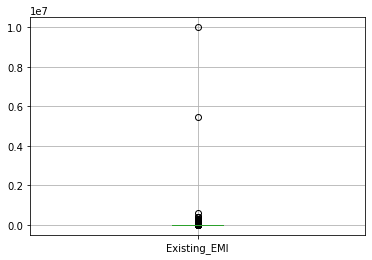

In [14]:
#Existing_EMI的缺失值被填补为0（中位数），因为只有111个缺失值
data.boxplot(column='Existing_EMI',return_type='axes')
data['Existing_EMI'].describe()
#Impute by median (0) because just 111 missing:
data['Existing_EMI'].fillna(0, inplace=True)

In [15]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print(data[['Interest_Rate','Interest_Rate_Missing']].head(10))

data.drop('Interest_Rate',axis=1,inplace=True)

   Interest_Rate  Interest_Rate_Missing
0            NaN                      1
1          13.25                      0
2            NaN                      1
3            NaN                      1
4            NaN                      1
5          13.99                      0
6            NaN                      1
7            NaN                      1
8          14.85                      0
9          18.25                      0


In [16]:
#Drop this variable because doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)

In [17]:
#Impute with median because only 111 missing:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

In [18]:
#High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [19]:
#创建了Loan_Amount_Submitted_Missing变量，当Loan_Amount_Submitted有缺失值时为1，反之为0，原本的Loan_Amount_Submitted变量被舍弃
#创建了Loan_Tenure_Submitted_Missing变量，当Loan_Tenure_Submitted有缺失值时为1，反之为0，原本的Loan_Tenure_Submitted变量被舍弃
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

In [20]:
#舍弃了LoggedIn,和Salary_Account
data.drop('LoggedIn',axis=1,inplace=True)

In [21]:
#Salary account has mnay banks which have to be manually grouped
data.drop('Salary_Account',axis=1,inplace=True)

In [22]:
#High proportion missing so create a new var whether present or not
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
data.drop('Processing_Fee',axis=1,inplace=True)

In [23]:
#Source-top保留了2个，其他组合成了不同的类别
 
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()
print(data['Source'])

0           S122
1           S122
2         others
3         others
4         others
           ...  
124732      S122
124733      S122
124734      S122
124735      S122
124736      S122
Name: Source, Length: 124737, dtype: object


In [25]:
data.apply(lambda x: sum(x.isnull()))

ID                                   0
Gender                               0
Monthly_Income                       0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Existing_EMI                         0
Mobile_Verified                      0
Var5                                 0
Var1                                 1
Filled_Form                          0
Device_Type                          0
Var2                                 0
Source                               0
Var4                                 0
Disbursed                        37718
source                               0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [26]:
data.dtypes

ID                                object
Gender                            object
Monthly_Income                     int64
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Existing_EMI                     float64
Mobile_Verified                   object
Var5                              object
Var1                              object
Filled_Form                       object
Device_Type                       object
Var2                              object
Source                            object
Var4                               int64
Disbursed                        float64
source                            object
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

In [28]:
#给不同的数字编码，起到区分作用的
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col].astype(str))

In [31]:
#get_dummies 是利用pandas实现one hot encode的方式。
data = pd.get_dummies(data, columns=var_to_encode)
print(data)

                 ID  Monthly_Income  Loan_Amount_Applied  Loan_Tenure_Applied  \
0       ID000002C20           20000             300000.0                  5.0   
1       ID000004E40           35000             200000.0                  2.0   
2       ID000007H20           22500             600000.0                  4.0   
3       ID000008I30           35000            1000000.0                  5.0   
4       ID000009J40          100000             500000.0                  2.0   
...             ...             ...                  ...                  ...   
124732  ID124809J40           40000            1000000.0                  4.0   
124733  ID124817R20           20500                  0.0                  0.0   
124734  ID124820U00           25000                  0.0                  0.0   
124735  ID124822W20          130000             600000.0                  0.0   
124736  ID124823X30           30000             100000.0                  1.0   

        Existing_EMI Var5  

In [32]:
print(data['source'])
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
#print(train.source)
#print(test.source)

0         train
1         train
2         train
3         train
4         train
          ...  
124732     test
124733     test
124734     test
124735     test
124736     test
Name: source, Length: 124737, dtype: object


In [33]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

F:\Anaconda\envs\xgboost\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
train.to_csv('dataset/train_modified.csv',index=False)
test.to_csv('dataset/test_modified.csv',index=False)